In [1]:
import pandas as pd
import os
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import inv
from scipy.sparse import diags
from tqdm import tqdm
import networkx as nx
import scipy.sparse
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score, precision_recall_curve, auc

os.getcwd()

'/Users/jonnycodd/Documents/MASTERS/Networks/RecommendationSystems_NetworksFP/code'

# Load data

In [139]:
# Load bi-partide network
bi_partide_network =  pd.read_csv("../output/collbarfilter.csv")

bi_partide_network.drop(bi_partide_network.columns[0], axis=1, inplace=True)
bi_partide_network.reset_index(drop=True, inplace=True)
bi_partide_network[bi_partide_network.notna()] += 2.5 # Make all values positive
bi_partide_network = bi_partide_network.fillna(0)
bi_partide_network_sparse = csr_matrix(bi_partide_network)
bi_partide_network

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
# Create binary matrix 
binary_network = bi_partide_network.copy()
binary_network.iloc[:, 1:] = (binary_network.iloc[:, 1:] > 0).astype(int)
#binary_network = binary_network.fillna(0)

# Convert to sparse matrix
binary_network_sparse = csr_matrix(binary_network.values)

binary_network


,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Algorithms

## With ratings

In [135]:
bi_partide_network_sparse[1,:]

<1x9719 sparse matrix of type '<class 'numpy.float64'>'
	with 9719 stored elements in Compressed Sparse Row format>

In [157]:
def probabilistic_spreading_with_ratings(user_item_matrix, user_index, K=9719):
    
    # Create vector of the movies the individual has seen and their ratings
    seen_movies = user_item_matrix[user_index, :]
    ratings = bi_partide_network_sparse[user_index, :].multiply(user_item_matrix[user_index, :])

    
    # Calculate the degree (sum) of each movie and user
    movie_degree = user_item_matrix.sum(axis=0)
    user_degree = user_item_matrix.sum(axis=1)
    
    # Calculate the inverse degree of each movie and user
    movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
    user_degree_inv = diags(1.0 / user_degree.A.ravel(), offsets=0)
    
    # Weighting seen movies by their ratings and inverse movie degree
    seen_movies_weighted = movie_degree_inv.dot(ratings.T)
    
    # Distribute resources of movies to the users
    resource_to_user = user_item_matrix.dot(seen_movies_weighted)
    
    # Weighting resources to users by inverse user degree
    resource_to_user_weighted = user_degree_inv.dot(resource_to_user)
    
    # Calculate final movie weights
    final_movie_weights = user_item_matrix.T.dot(resource_to_user_weighted)
    final_movie_weights = final_movie_weights.T  # Transpose to match original shape
    
    # Zero out the movies already seen
    final_movie_weights[0, seen_movies.nonzero()[1]] = 0
    
    # Convert to dense for argsort operation
    final_movie_weights_dense = np.array(final_movie_weights.todense()).ravel()

    # Get the indices of the top K values
    top_k_indices = np.argsort(final_movie_weights_dense)[-K:][::-1]

    # Select the K highest weights
    top_k_weights = final_movie_weights_dense[top_k_indices]

    return top_k_weights, top_k_indices, final_movie_weights_dense


In [158]:
weights, indices, _ = probabilistic_spreading_with_ratings(binary_network_sparse, 0, 10)

## Binary

In [144]:
def probabilistic_spreading_binary(user_item_sparse, user_index, K = 9719):
    
    # Create vector of the movies the individual has seen
    seen_movies = user_item_sparse[user_index, :]
    
    # Calculate the degree (sum) of each movie and user
    movie_degree = user_item_sparse.sum(axis=0)
    user_degree = user_item_sparse.sum(axis=1)
    
    # Calculate the inverse degree of each movie and user
    movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
    user_degree_inv = diags(1.0 / user_degree.A.ravel(), offsets=0)
    
    # Weighting seen movies by inverse movie degree
    seen_movies_weighted = movie_degree_inv.dot(seen_movies.T)
    
    # Distribute resources of movies to the users
    resource_to_user = user_item_sparse.dot(seen_movies_weighted)
    
    # Weighting resources to users by inverse user degree
    resource_to_user_weighted = user_degree_inv.dot(resource_to_user)
    
    # Calculate final movie weights
    final_movie_weights = user_item_sparse.T.dot(resource_to_user_weighted)
    final_movie_weights = final_movie_weights.T  # Transpose to match original shape
    
    # Zero out the movies already seen
    final_movie_weights[0, seen_movies.nonzero()[1]] = 0
    
    # Convert to dense for argsort operation
    final_movie_weights_dense = np.array(final_movie_weights.todense()).ravel()

    # Get the indices of the top K values
    top_k_indices = np.argsort(final_movie_weights_dense)[-K:][::-1]

    # Select the K highest weights
    top_k_weights = final_movie_weights_dense[top_k_indices]
    

    return top_k_weights,  top_k_indices, final_movie_weights_dense



In [145]:
weights, indices, _ = probabilistic_spreading_binary(binary_network_sparse, 0, 10)

In [146]:
weights

array([0.65101011, 0.55851196, 0.45469533, 0.44257122, 0.43470222,
       0.4281437 , 0.41608424, 0.41454562, 0.41378308, 0.3866272 ])

In [ ]:
test_array  = np.array([
    [1, 0, 0, 1, 0],
    [1, 1, 1, 1, 0],
    [1, 0, 1, 1, 0],
    [0, 0, 1, 0, 1]
    ])
test = csr_matrix(test_array)

weights, indices = probabilistic_spreading_binary(test, 0, 3)
weights, indices

(array([0.38888889, 0.16666667, 0.        ]), array([2, 1, 4]))

# Evaluate recommendations over time

In [10]:
# Define a function to plot the movie degree after different iterations
def movie_degree_rank_plot(movie_degrees, num_iterations):
    sorted_indices = np.argsort(movie_degrees)[::-1]
    sorted_degrees = movie_degrees[sorted_indices]
    ranks = np.arange(1, len(movie_degrees) + 1)

    # Plotting degree rank plot
    plt.plot(ranks, sorted_degrees, marker='o', linestyle='-', color='b')
    plt.title(f'Degree Rank Plot after {num_iterations} iterations')
    plt.xlabel('Rank')
    plt.ylabel('Degree')
    plt.xscale('log')  # Set x-axis to logarithmic scale
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.savefig(f'../figures/Prob S movie rank plot - {num_iterations} iterations')
    plt.show()


In [11]:
# Define a function to plot the movie degree after the algorithm has run
def plot_recomendation_counts(reccomendation_counts, num_iterations):
    
    # Example column labels from the bipartite network (replace it with your actual data)
    column_labels = bi_partide_network.columns

    # Get indices of nonzero movie degree values
    nonzero_indices = np.where(reccomendation_counts != 0)[0]

    # Filtered movie degree array and corresponding labels
    filtered_movie_degree = reccomendation_counts[nonzero_indices]
    filtered_column_labels = [column_labels[i] for i in nonzero_indices]

    # Sort filtered movie degree array and corresponding labels
    sorted_indices = np.argsort(filtered_movie_degree)[::-1]
    sorted_filtered_movie_degree = filtered_movie_degree[sorted_indices][:500]
    sorted_filtered_column_labels = [filtered_column_labels[i] for i in sorted_indices][:500]

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_filtered_movie_degree)), sorted_filtered_movie_degree)
    # Removed xticks setting for labels
    plt.title(f'Recommendations count after {num_iterations} iterations')
    plt.ylabel('Recommendation Count')
    plt.xlabel('Rank')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.savefig(f'../figures/Prob S movie recommendations - {num_iterations} iterations')
    plt.show()

In [12]:
# Plot evoloution of reccomended movies over time
def temporal_recommendations(binary_network_sparse, iterations, plot_points = [], algorithm = probabilistic_spreading_binary):
    # Calculate initial movie degrees
    movie_degrees = np.array(binary_network_sparse.sum(axis=0)).squeeze()
    reccomendation_counts = np.zeros(len(movie_degrees))

    for j in tqdm(range(1, iterations + 1), desc="Progress"):
        recommendations = []

        # Loop over users
        for i in range(binary_network_sparse.shape[0]):
            # Get index of top recommended film
            _, index,  _  = algorithm(binary_network_sparse, i, 1)
            recommendations.append((i, index[0]))
            reccomendation_counts[index[0]] += 1

        # Update matrix 
        row_indices, col_indices = zip(*recommendations)
        binary_network_sparse[row_indices, col_indices] = 1

        # Update movie degrees
        updated_degrees = np.array(binary_network_sparse.sum(axis=0)).squeeze()
        movie_degrees += updated_degrees - movie_degrees

        # Store degree information at plot_points iterations
        if j in plot_points:
            movie_degree_rank_plot(movie_degrees, j)
            plot_recomendation_counts(reccomendation_counts, j)


    return binary_network_sparse, movie_degrees, reccomendation_counts

Progress:   0%|          | 0/100 [00:00<?, ?it/s]/var/folders/js/pnl2ymz143j6txn5bftwltm40000gn/T/ipykernel_5378/1982918487.py:11: RuntimeWarning: divide by zero encountered in divide
  movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
/Users/jonnycodd/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
Progress:   9%|▉         | 9/100 [00:14<02:23,  1.58s/it]

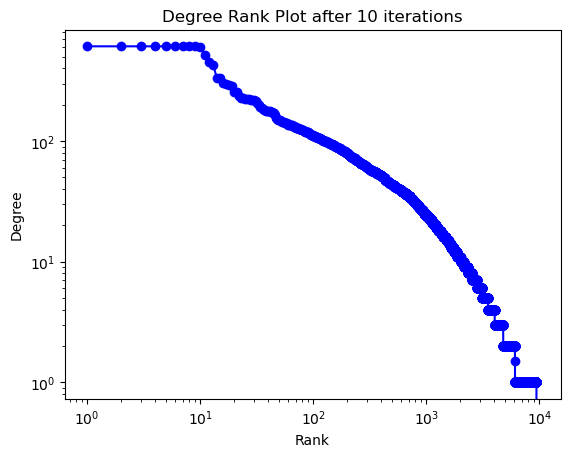

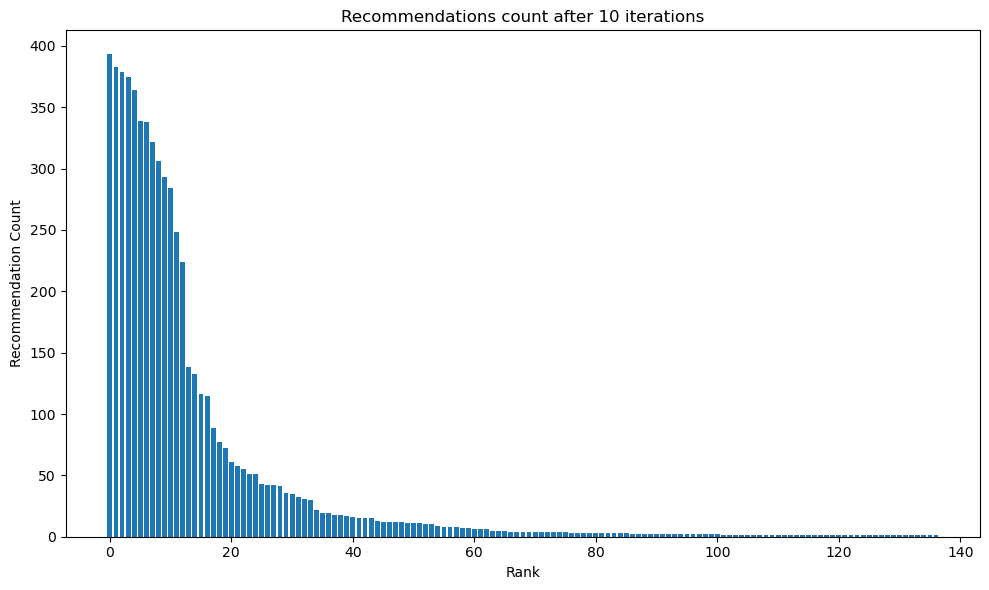

Progress:  99%|█████████▉| 99/100 [03:06<00:02,  2.12s/it]

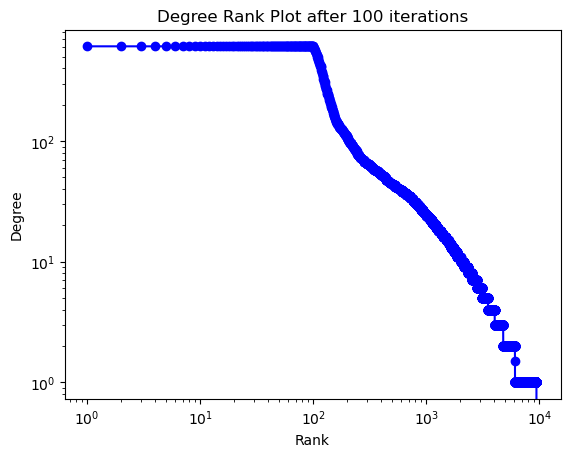

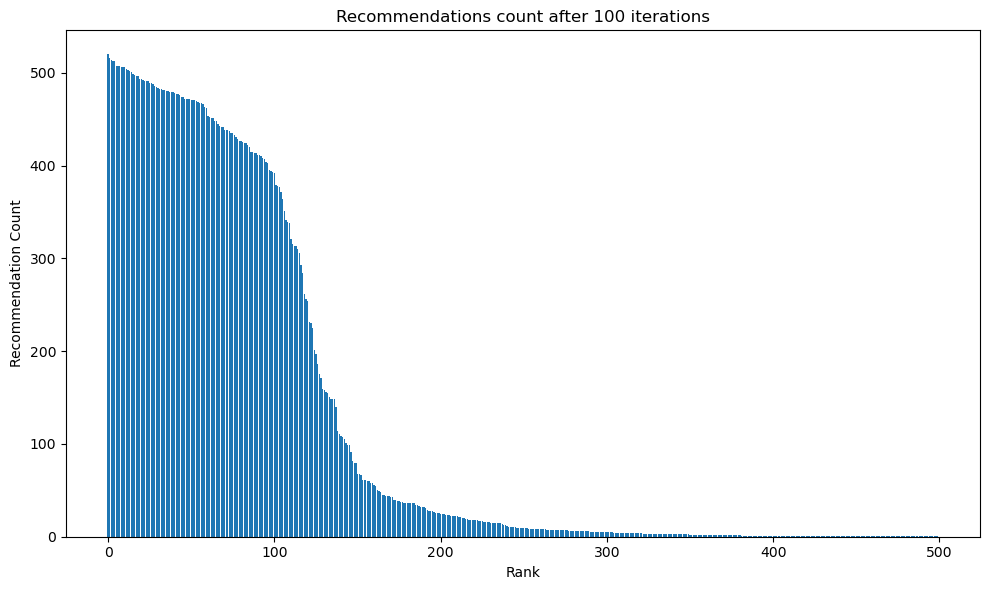

Progress: 100%|██████████| 100/100 [03:09<00:00,  1.89s/it]


In [ ]:
binary_network_sparse, movie_degrees, reccomendation_counts = temporal_recommendations(binary_network_sparse, 100, [10, 100])

Progress:   0%|          | 0/100 [00:00<?, ?it/s]/var/folders/js/pnl2ymz143j6txn5bftwltm40000gn/T/ipykernel_5378/473928346.py:12: RuntimeWarning: divide by zero encountered in divide
  movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
Progress:   9%|▉         | 9/100 [00:17<02:53,  1.91s/it]

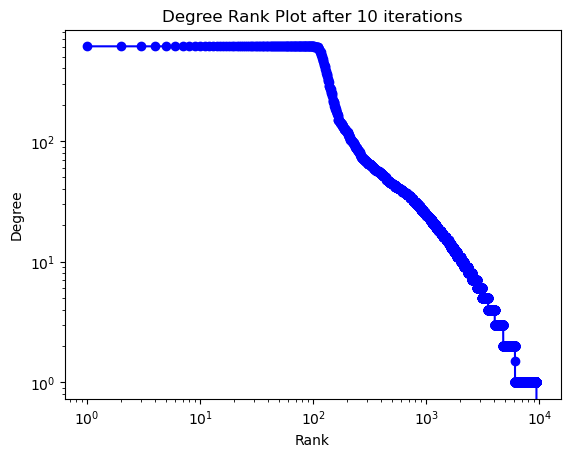

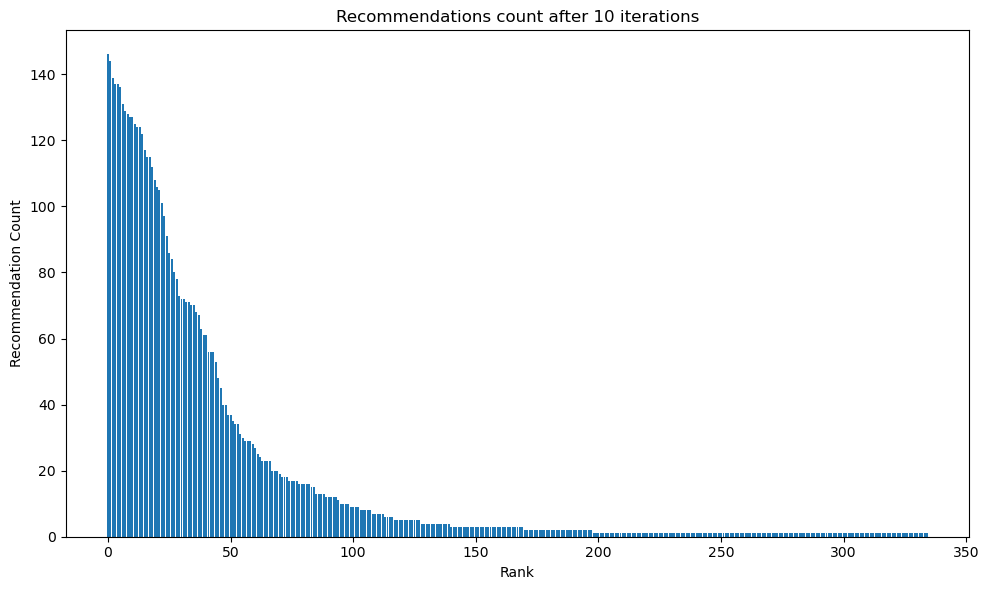

Progress:  99%|█████████▉| 99/100 [03:27<00:02,  2.23s/it]

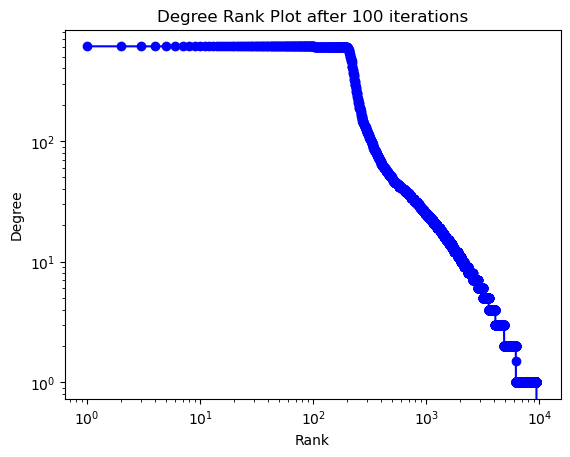

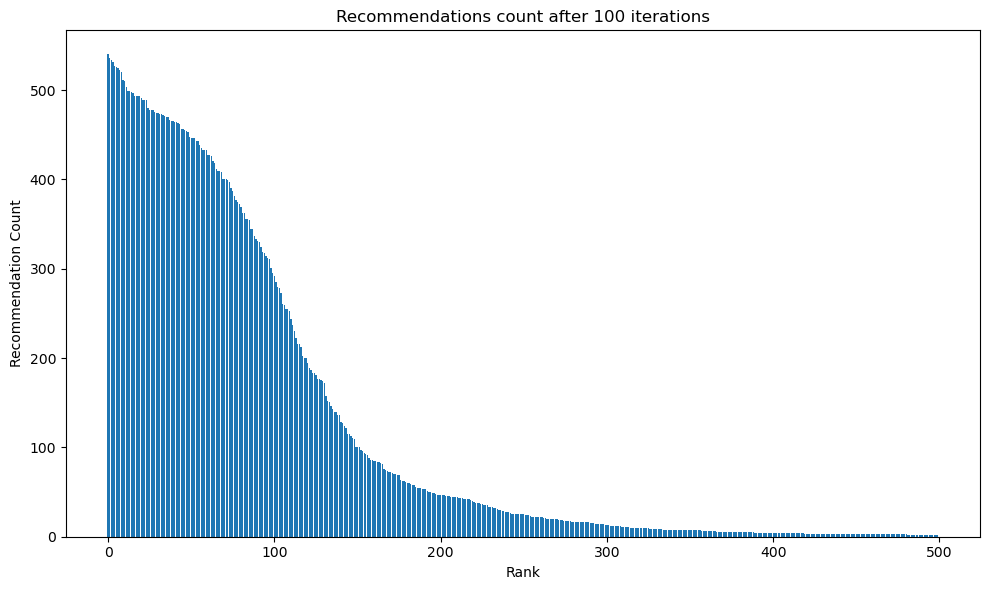

Progress: 100%|██████████| 100/100 [03:30<00:00,  2.10s/it]


In [ ]:
binary_network_sparse, movie_degrees, reccomendation_counts = temporal_recommendations(binary_network_sparse, 100, [10, 100], probabilistic_spreading_with_ratings)

# Out of sample performance

In [147]:
def train_test_split(df, perc):
    # Ensure `perc` is between 0 and 1
    perc = max(min(perc, 1), 0)

    train = df.copy()
    
    # Create the DataFrame for removed ratings with the same structure as `df`
    removed_ratings_df = pd.DataFrame(index=train.index, columns=train.columns)
    
    # Iterate over each user in the DataFrame
    for user in tqdm(train.index, desc = "Train-test split user: "):
        # Get indices of the non-NaN ratings for the user
        user_ratings = train.loc[user]
        non_nan_indices = user_ratings[user_ratings != 0].index
        
        # Calculate the number of ratings to remove for the user
        num_to_remove = int(len(non_nan_indices) * perc)
        
        # Randomly select indices (movies) to remove
        indices_to_remove = np.random.choice(non_nan_indices, size=num_to_remove, replace=False)
        
        # Set the selected ratings to NaN in `df` and move them to `removed_ratings_df`
        for movie in indices_to_remove:
            removed_ratings_df.at[user, movie] = train.at[user, movie]
            train.at[user, movie] = np.nan
    
    # Optionally, you can fill NaN values with 0 or another value in both DataFrames
    train.fillna(0, inplace=True)
    removed_ratings_df.fillna(0, inplace=True)
    
    return train, removed_ratings_df

First we create a data frame where a cell = 1 if the movie has above average rating for the user and 0 otherwise.

In [148]:
bi_partide_network_pos_neg = pd.read_csv("../output/collbarfilter.csv")
bi_partide_network_pos_neg.drop(bi_partide_network_pos_neg.columns[0], axis=1, inplace=True)
bi_partide_network_pos_neg.reset_index(drop=True, inplace=True)

# Calculate the mean of each row, ignoring NaNs
row_means = bi_partide_network_pos_neg.mean(axis=1, skipna=True)

# Copy the original DataFrame to maintain its structure and NaN values
pos_neg_network_df = bi_partide_network_pos_neg.copy()

# Iterate over each element and set to 1 if above row mean, else 0, maintaining NaNs
for i, row in pos_neg_network_df.iterrows():
    pos_neg_network_df.loc[i] = row.where(row.isna(), np.where(row > row_means[i], 1, 0))

pos_neg_network_df


,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Binary algorithm network

In [149]:
# Train test split of binary network
train, test = train_test_split(binary_network, 0.2)

# Make sparse
train_sparse = csr_matrix(train.values)
test_sparse = csr_matrix(test.values)

Train-test split user: 100%|██████████| 610/610 [00:00<00:00, 1053.42it/s]


In [150]:
# Output a dataframe of predicitions for each user
weights_list = []

for user_id in tqdm(range(test.shape[0]), desc="Computing metrics"):
    _, _, weights = probabilistic_spreading_binary(train_sparse, user_id)
    weights_list.append(weights)

# Convert the list of arrays into a DataFrame
weights_df = pd.DataFrame(weights_list, columns=train.columns)

Computing metrics:   0%|          | 0/610 [00:00<?, ?it/s]/var/folders/js/pnl2ymz143j6txn5bftwltm40000gn/T/ipykernel_6713/3546942668.py:11: RuntimeWarning: divide by zero encountered in divide
  movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
Computing metrics: 100%|██████████| 610/610 [00:01<00:00, 425.36it/s]


In [152]:
weights_df

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.0,0.002589,0.002447,0.001582,0.001582,0.001110,0.045437,0.001827,0.046172,0.015956,...,0.001568,0.005879,0.004248,0.001953,0.000087,0.045027,0.035302,0.005493,0.000000,0.005111
1,0.0,0.000242,0.000000,0.000000,0.000000,0.000253,0.001691,0.000038,0.016962,0.001033,...,0.000461,0.001073,0.001193,0.000104,0.000764,0.002966,0.003643,0.001530,0.003778,0.000000
2,0.0,0.000310,0.000787,0.000625,0.000625,0.000069,0.006896,0.000240,0.007695,0.001098,...,0.000269,0.001156,0.000623,0.000252,0.000000,0.006449,0.004518,0.002121,0.008077,0.000543
3,0.0,0.001582,0.000642,0.000957,0.000957,0.000486,0.027806,0.002617,0.037944,0.012714,...,0.000950,0.002665,0.002219,0.000581,0.000178,0.049885,0.022105,0.002951,0.052790,0.002100
4,0.0,0.000193,0.000289,0.000000,0.000000,0.000135,0.003696,0.000208,0.006840,0.001196,...,0.000106,0.000890,0.000339,0.000120,0.000000,0.004756,0.004069,0.000806,0.006461,0.000221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.0,0.010915,0.009675,0.012150,0.012150,0.005603,0.138074,0.019228,0.236119,0.040131,...,0.005999,0.026055,0.012978,0.003837,0.001098,0.169364,0.174546,0.027430,0.191876,0.010109
606,0.0,0.001320,0.001025,0.004241,0.004241,0.000629,0.029866,0.001080,0.037253,0.013591,...,0.000983,0.005697,0.003560,0.001645,0.000000,0.034713,0.028869,0.005368,0.051159,0.003935
607,0.0,0.005584,0.004589,0.005167,0.005167,0.005805,0.132458,0.005219,0.206189,0.048912,...,0.007095,0.032712,0.024237,0.010044,0.000415,0.000000,0.000000,0.034430,0.194889,0.005537
608,0.0,0.000258,0.000060,0.000000,0.000000,0.000080,0.002938,0.000061,0.004505,0.001793,...,0.000068,0.000500,0.000592,0.000088,0.000000,0.004950,0.002746,0.000527,0.004698,0.000140


In [151]:
# Convert test df to numpy
test_array = test.to_numpy()

# Convert pos/neg score df to numpy
pos_neg_array = pos_neg_network_df.to_numpy()

# Convert weights_df to numpy array
weights_array = weights_df.to_numpy()

# Flatten arrays to 1D
test_flat = test_array.flatten()
pos_neg_flat = pos_neg_array.flatten()
weights_flat = weights_array.flatten()

# Filter to keep only the films held out in test
filter_mask = test_flat == 1
filtered_pos_neg = pos_neg_flat[filter_mask]
filtered_weights = weights_flat[filter_mask]

# Calculate AUC
auc_score = roc_auc_score(filtered_pos_neg, filtered_weights)

print(f"The AUC score is: {auc_score}")

The AUC score is: 0.564746135322466


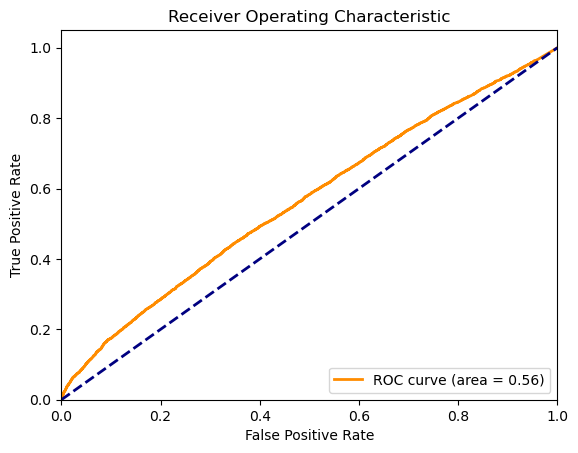

In [153]:
# Compute FPR, TPR, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(filtered_pos_neg, filtered_weights)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [154]:
average_precision = average_precision_score(filtered_pos_neg, filtered_weights)
print(f"Average Precision: {average_precision}")

Average Precision: 0.615194713242058


## Algorithm with ratings

In [160]:
# Train test split 
train, test = train_test_split(binary_network, 0.2)

Train-test split user: 100%|██████████| 610/610 [00:00<00:00, 952.93it/s] 


In [161]:
# Make sparse
train_sparse = csr_matrix(train.values)
test_sparse = csr_matrix(test.values)

In [162]:
# Output a dataframe of predicitions for each user
weights_list = []

for user_id in tqdm(range(test.shape[0]), desc="Computing metrics"):
    _, _, weights = probabilistic_spreading_with_ratings(train_sparse, user_id)
    weights_list.append(weights)

# Convert the list of arrays into a DataFrame
weights_df = pd.DataFrame(weights_list, columns=train.columns)
weights_df

Computing metrics:   0%|          | 0/610 [00:00<?, ?it/s]/var/folders/js/pnl2ymz143j6txn5bftwltm40000gn/T/ipykernel_6713/276921209.py:13: RuntimeWarning: divide by zero encountered in divide
  movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
Computing metrics: 100%|██████████| 610/610 [00:01<00:00, 401.95it/s]


,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.012917,0.0,0.016641,0.009837,0.024680,0.006146,0.137101,0.008503,0.178180,0.055484,...,0.0,0.049828,0.019755,0.003229,0.000410,0.202250,0.121183,0.024595,0.000000,0.019463
1,0.003616,0.0,0.000971,0.000000,0.000000,0.001228,0.006368,0.000150,0.061357,0.003729,...,0.0,0.004854,0.005919,0.000904,0.002383,0.014932,0.014168,0.005809,0.015259,0.000000
2,0.001568,0.0,0.028011,0.000385,0.000484,0.000368,0.009956,0.000246,0.005660,0.002689,...,0.0,0.006352,0.000936,0.000392,0.000000,0.009594,0.005704,0.012372,0.015551,0.001990
3,0.011276,0.0,0.008714,0.006130,0.015653,0.001125,0.078733,0.009823,0.156996,0.070140,...,0.0,0.017725,0.008683,0.002819,0.000152,0.205665,0.073883,0.016347,0.177487,0.006290
4,0.000825,0.0,0.001278,0.000000,0.001205,0.000300,0.016801,0.001089,0.024562,0.003649,...,0.0,0.004072,0.001263,0.000206,0.000000,0.024957,0.013690,0.004408,0.026333,0.000944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.062981,0.0,0.069386,0.075638,0.145883,0.014967,0.392935,0.074521,0.859291,0.168783,...,0.0,0.120813,0.048748,0.015745,0.003024,0.689832,0.461651,0.109276,0.692065,0.042940
606,0.007035,0.0,0.008779,0.001965,0.008453,0.003150,0.091185,0.005779,0.120153,0.050733,...,0.0,0.038286,0.011513,0.001759,0.000246,0.143936,0.078261,0.024915,0.190422,0.015739
607,0.087563,0.0,0.033103,0.016900,0.035116,0.017394,0.303781,0.017273,0.622205,0.161057,...,0.0,0.142779,0.073403,0.021891,0.003375,0.000000,0.511531,0.145613,0.587670,0.018312
608,0.000591,0.0,0.000778,0.000000,0.000130,0.000295,0.008494,0.000738,0.012064,0.006451,...,0.0,0.001853,0.001307,0.000148,0.000000,0.013146,0.006805,0.002151,0.016574,0.000882


In [163]:
weights_df = weights_df.div(weights_df.max(axis=1), axis=0)
weights_df

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.005719,0.0,0.007367,0.004355,0.010926,0.002721,0.060697,0.003764,0.078884,0.024564,...,0.0,0.022060,0.008746,0.001430,0.000181,0.089540,0.053650,0.010889,0.000000,0.008617
1,0.007973,0.0,0.002142,0.000000,0.000000,0.002708,0.014041,0.000331,0.135303,0.008224,...,0.0,0.010704,0.013053,0.001993,0.005255,0.032928,0.031242,0.012810,0.033650,0.000000
2,0.012464,0.0,0.222670,0.003057,0.003846,0.002922,0.079144,0.001956,0.044997,0.021372,...,0.0,0.050495,0.007438,0.003116,0.000000,0.076265,0.045340,0.098353,0.123624,0.015820
3,0.006567,0.0,0.005075,0.003570,0.009117,0.000655,0.045856,0.005721,0.091439,0.040852,...,0.0,0.010323,0.005057,0.001642,0.000088,0.119785,0.043031,0.009521,0.103373,0.003664
4,0.001068,0.0,0.001655,0.000000,0.001561,0.000388,0.021754,0.001410,0.031802,0.004725,...,0.0,0.005273,0.001635,0.000267,0.000000,0.032313,0.017726,0.005708,0.034094,0.001222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.008593,0.0,0.009466,0.010319,0.019903,0.002042,0.053609,0.010167,0.117234,0.023027,...,0.0,0.016483,0.006651,0.002148,0.000413,0.094115,0.062984,0.014909,0.094419,0.005858
606,0.003671,0.0,0.004581,0.001025,0.004411,0.001644,0.047583,0.003016,0.062700,0.026474,...,0.0,0.019979,0.006008,0.000918,0.000128,0.075110,0.040839,0.013002,0.099369,0.008213
607,0.015161,0.0,0.005732,0.002926,0.006080,0.003012,0.052598,0.002991,0.107731,0.027886,...,0.0,0.024721,0.012709,0.003790,0.000584,0.000000,0.088568,0.025212,0.101752,0.003171
608,0.001125,0.0,0.001481,0.000000,0.000247,0.000561,0.016170,0.001405,0.022966,0.012281,...,0.0,0.003527,0.002488,0.000281,0.000000,0.025027,0.012954,0.004096,0.031552,0.001680


In [164]:
# Convert test df to numpy
test_array = test.to_numpy()

# Convert pos/neg score df to numpy
pos_neg_array = pos_neg_network_df.to_numpy()

# Convert weights_df to numpy array
weights_array = weights_df.to_numpy()

# Flatten arrays to 1D
test_flat = test_array.flatten()
pos_neg_flat = pos_neg_array.flatten()
weights_flat = weights_array.flatten()

# Filter to keep only the films held out in test
filter_mask = test_flat == 1
filtered_pos_neg = pos_neg_flat[filter_mask]
filtered_weights = weights_flat[filter_mask]

# Calculate AUC
auc_score = roc_auc_score(filtered_pos_neg, filtered_weights)

print(f"The AUC score is: {auc_score}")

The AUC score is: 0.5840242394487494


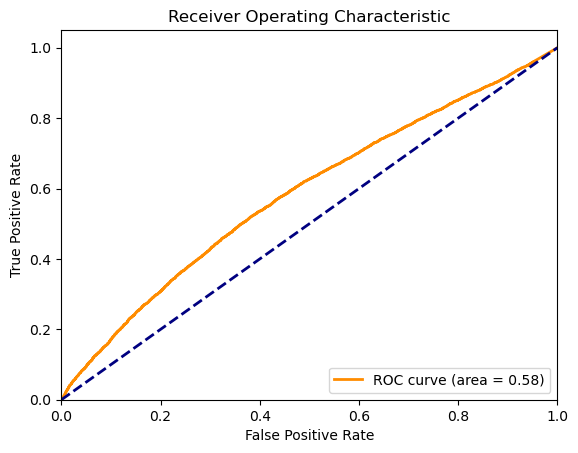

In [165]:
# Calculate the AUC
fpr, tpr, thresholds = roc_curve(filtered_pos_neg, filtered_weights)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [166]:
average_precision = average_precision_score(filtered_pos_neg, filtered_weights)
print(f"Average Precision: {average_precision}")

Average Precision: 0.6221707405402445


## Recommending highest rated movies

In [168]:
bi_partide_network_highrated= pd.read_csv("../output/collbarfilter.csv")
bi_partide_network_highrated.drop(bi_partide_network_highrated.columns[0], axis=1, inplace=True)
bi_partide_network_highrated.reset_index(drop=True, inplace=True)

# make all positive
bi_partide_network_highrated += 2.5
bi_partide_network_highrated 

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
# Train test split 
train, test = train_test_split(bi_partide_network_highrated, 0.2)

Train-test split user: 100%|██████████| 610/610 [00:29<00:00, 20.58it/s]


In [183]:
train = train.replace(0, np.nan)

In [184]:
column_means = train.mean()

# Replace each column with its mean
for column in train.columns:
    train[column] = column_means[column]

In [189]:
train = train.replace(np.nan, 0)
train = train/5
train

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.0,0.8,0.0,0.0,0.8,0.3,0.684615,0.6,0.734286,0.65,...,0.3,0.75,0.733333,0.6,0.6,0.780952,0.56,0.425,0.628571,0.2
1,0.0,0.8,0.0,0.0,0.8,0.3,0.684615,0.6,0.734286,0.65,...,0.3,0.75,0.733333,0.6,0.6,0.780952,0.56,0.425,0.628571,0.2
2,0.0,0.8,0.0,0.0,0.8,0.3,0.684615,0.6,0.734286,0.65,...,0.3,0.75,0.733333,0.6,0.6,0.780952,0.56,0.425,0.628571,0.2
3,0.0,0.8,0.0,0.0,0.8,0.3,0.684615,0.6,0.734286,0.65,...,0.3,0.75,0.733333,0.6,0.6,0.780952,0.56,0.425,0.628571,0.2
4,0.0,0.8,0.0,0.0,0.8,0.3,0.684615,0.6,0.734286,0.65,...,0.3,0.75,0.733333,0.6,0.6,0.780952,0.56,0.425,0.628571,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.0,0.8,0.0,0.0,0.8,0.3,0.684615,0.6,0.734286,0.65,...,0.3,0.75,0.733333,0.6,0.6,0.780952,0.56,0.425,0.628571,0.2
606,0.0,0.8,0.0,0.0,0.8,0.3,0.684615,0.6,0.734286,0.65,...,0.3,0.75,0.733333,0.6,0.6,0.780952,0.56,0.425,0.628571,0.2
607,0.0,0.8,0.0,0.0,0.8,0.3,0.684615,0.6,0.734286,0.65,...,0.3,0.75,0.733333,0.6,0.6,0.780952,0.56,0.425,0.628571,0.2
608,0.0,0.8,0.0,0.0,0.8,0.3,0.684615,0.6,0.734286,0.65,...,0.3,0.75,0.733333,0.6,0.6,0.780952,0.56,0.425,0.628571,0.2


In [192]:
test

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0
1,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0
2,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0
3,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0
4,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0
606,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0
607,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0
608,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0


In [194]:
# Convert test df to numpy
test_array = test.to_numpy()

# Convert pos/neg score df to numpy
pos_neg_array = pos_neg_network_df.to_numpy()

# Convert weights_df to numpy array
weights_array = train.to_numpy()

# Flatten arrays to 1D
test_flat = test_array.flatten()
pos_neg_flat = pos_neg_array.flatten()
weights_flat = weights_array.flatten()

# Filter to keep only the films held out in test
filter_mask = test_flat !=0
filtered_pos_neg = pos_neg_flat[filter_mask]
filtered_weights = weights_flat[filter_mask]

# Calculate AUC
auc_score = roc_auc_score(filtered_pos_neg, filtered_weights)

print(f"The AUC score is: {auc_score}")

The AUC score is: 0.6737902141453184
